In [1]:
library(tidyverse)
library(lubridate)
library(distr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'distr' was built under R version 3.6.3"Loading required package: startupmsg
Utilities for Start-Up Messages (version 0.9.6)
For more information see ?"startupmsg", NEWS("startupmsg")

Loading required package: sfsmisc
Warning message:
"package

### Question 1

[1] 0

[1] 0

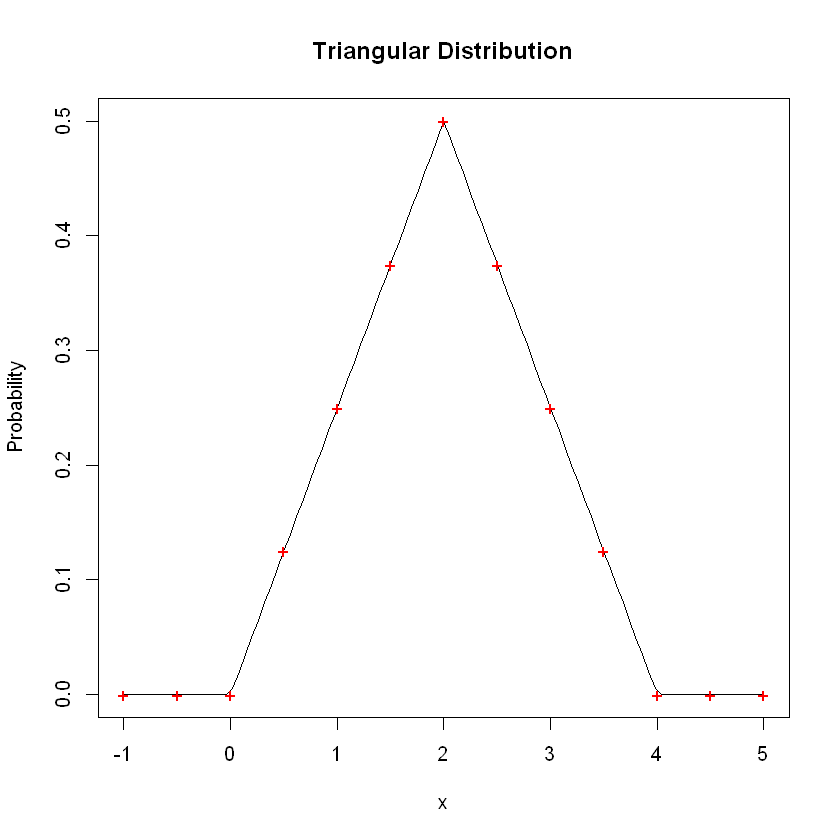

In [2]:
triangle_dist <- function(z) {#, a, c, b) {
    r = 0
    a = 0
    b = 4
    c = 2
    if (z < c && z > a)
        r = (2*(z-a))/((b-a)*(c-a))
    if (c <= z && z < b)
        r = (2*(b-z))/((b-a)*(b-c))
    #else 
    #    r = 0
    return(r)
    }

#triangle_dist(6, 1, 4, 8)
triangle_dist(40)
triangle_dist(79)
#x <- 0:100
curve(Vectorize(triangle_dist)(x), from = -1, to = 5, main = "Triangular Distribution", ylab = "Probability")

s <- seq(-1,5,0.5)
point <- lapply(s, FUN = triangle_dist)
points(s, point, pch = "+", col = "red")

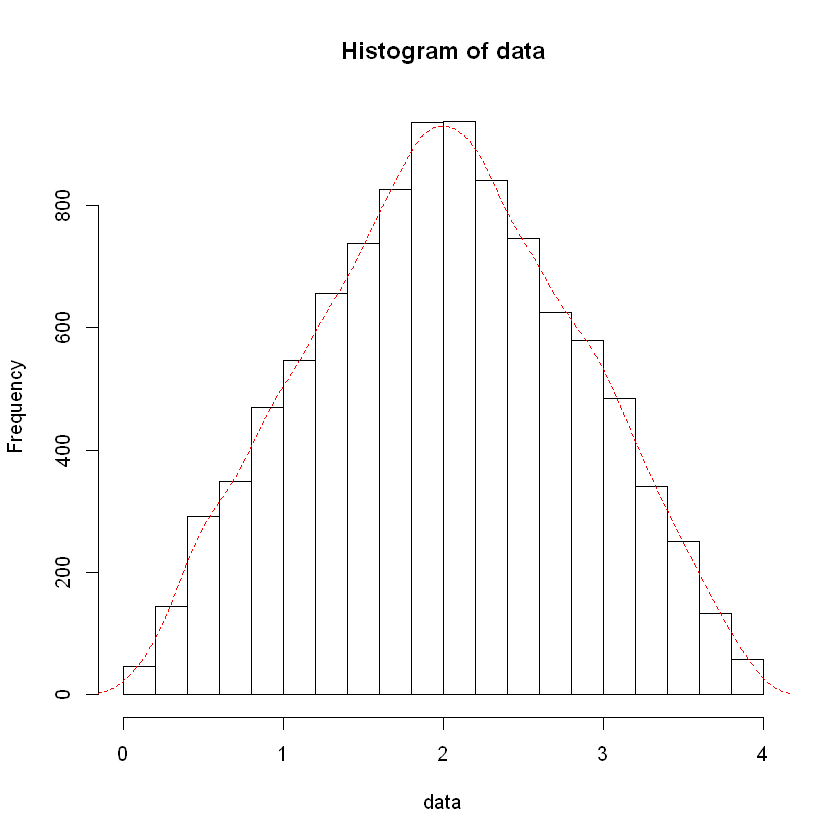

In [3]:
x <- seq(-1, 5, 0.01) 

myprob <- lapply(x, FUN = triangle_dist)

data <- sample(x, size = 10000, replace = T, prob = myprob)

hval <- h <- hist(data, plot=FALSE)
#hval$counts <- cumsum(hval$counts)
plot(h)
d <- density(data)
lines(x = d$x, y = d$y * length(data) * diff(h$breaks)[1], col = "red", lty=2)



### Question 2

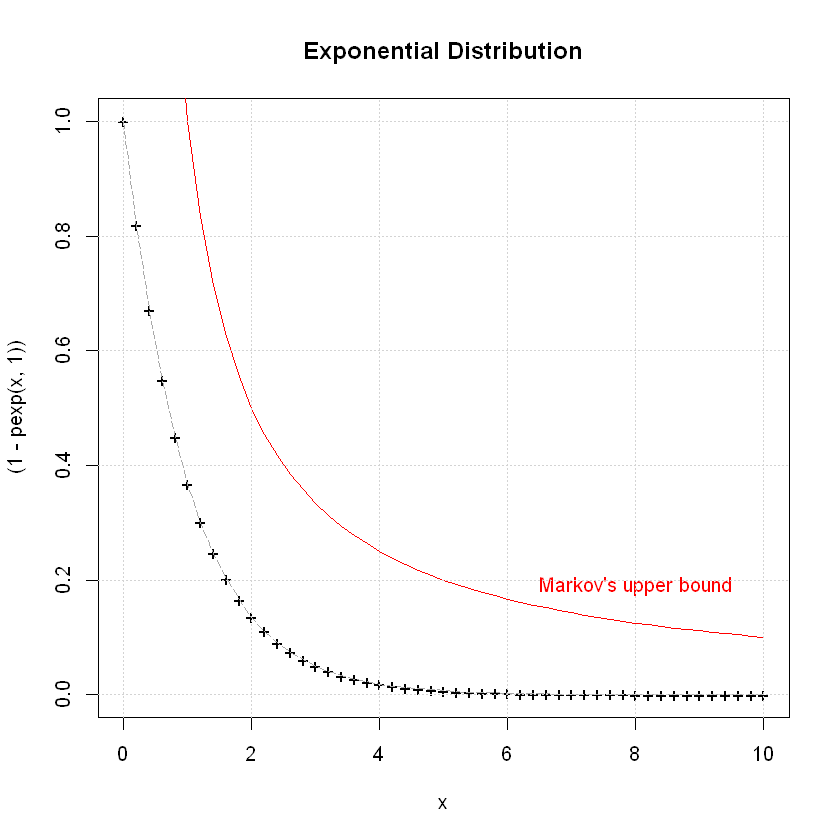

In [4]:
#a) exponential 
x <- seq(0, 10, 0.2)
lambda = 1

plot(x, (1-pexp(x, 1)), pch = "+", main = "Exponential Distribution")
lines(x, 1-pexp(x, 1), lty = "longdash", col = "darkgrey")

#expectation value 
E <- 1/lambda

#plot markov's upper bound
lines(x, E/x, col = "red")
#abline(h = 1, col = "red")
text(x = 8, y=0.19, "Markov's upper bound", col = "red")
grid()


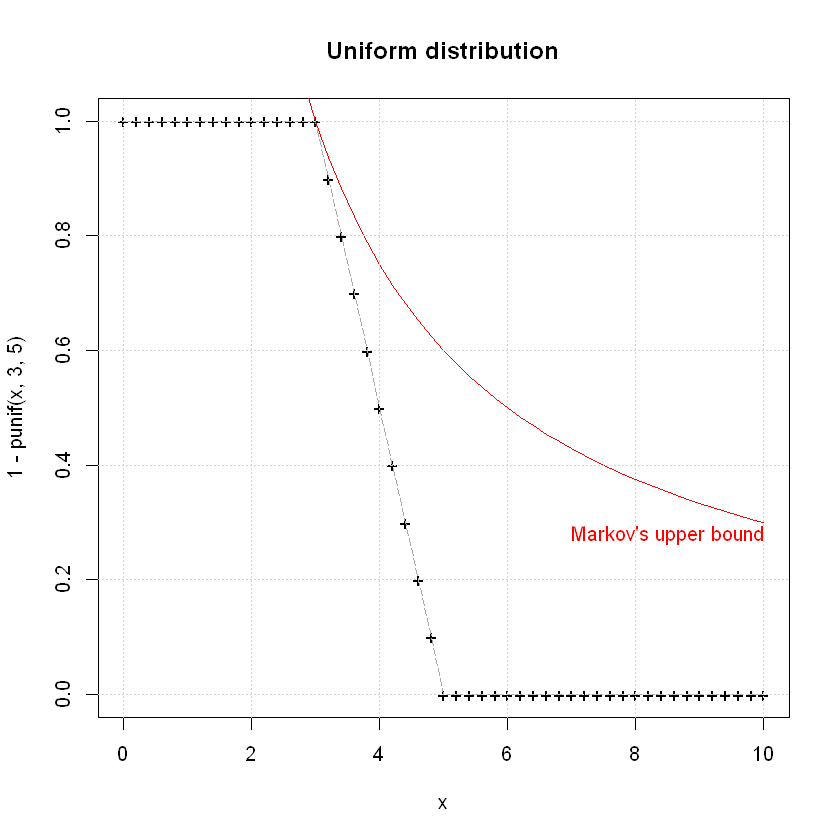

In [5]:
#b) 
plot(x, 1-punif(x, 3, 5), pch = "+", main = "Uniform distribution")
lines(x, 1-punif(x, 3, 5), lty = "longdash", col = "darkgrey")

lines(x, 3/x, col = "red")
text(x = 8.5, y=0.28, "Markov's upper bound", col = "red")
grid()


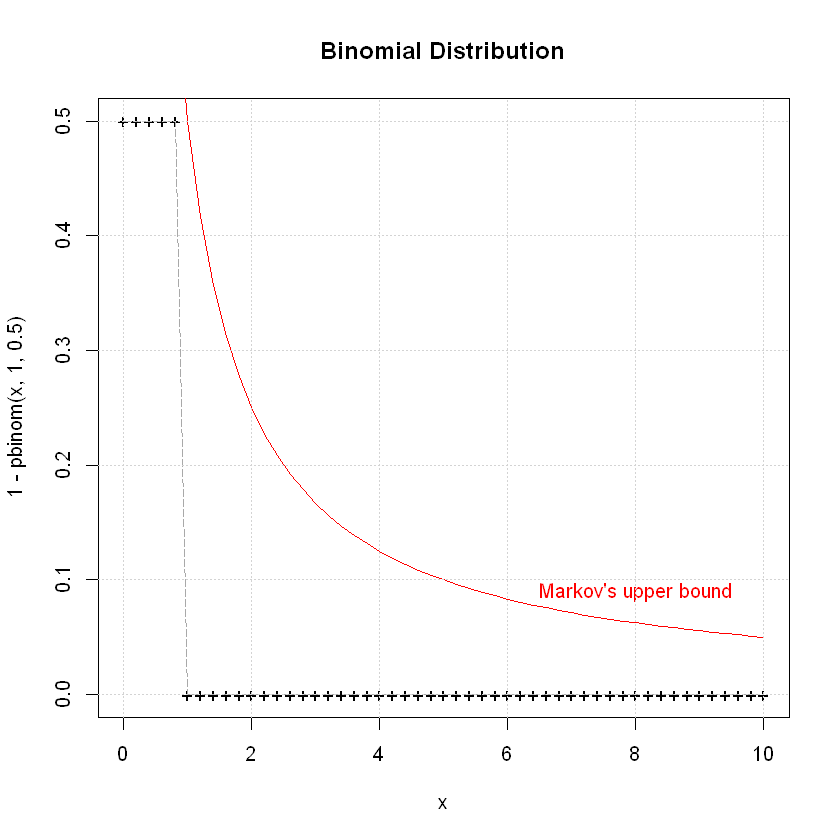

In [6]:
#c)
#x <- 0:10
plot(x, 1-pbinom(x, 1, 0.5), pch = "+", main = "Binomial Distribution")
lines(x, 1-pbinom(x, 1, 0.5), lty = "longdash", col = "darkgrey")

lines(x, (1*0.5/x), col = "red")
text(x = 8, y=0.09, "Markov's upper bound", col = "red")
grid()



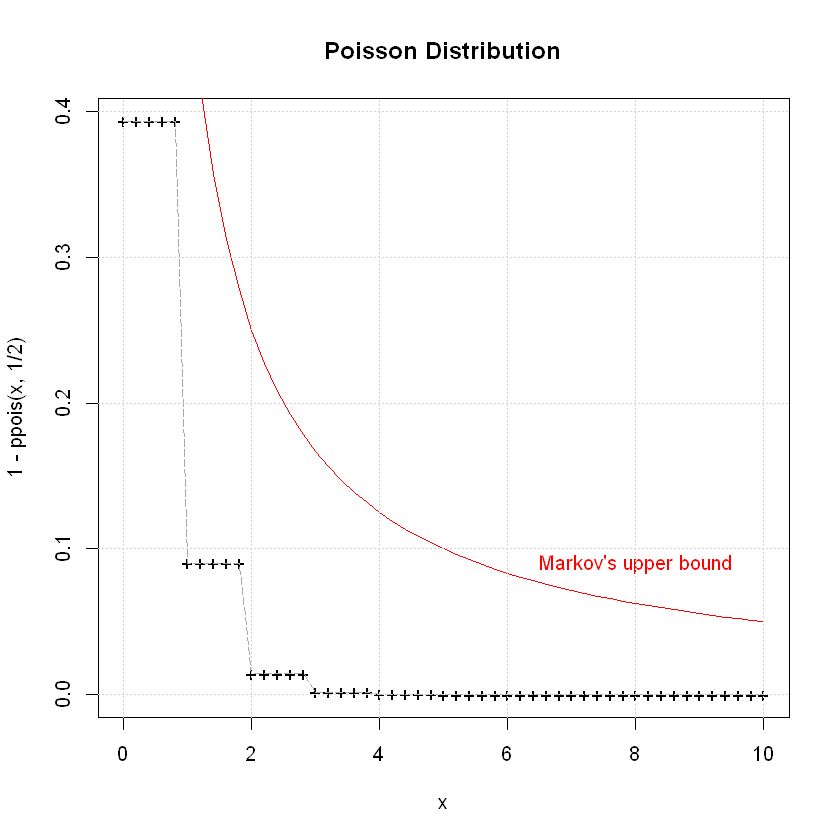

In [7]:
#d) 
plot(x, 1-ppois(x, 1/2), pch = "+", main = "Poisson Distribution")
lines(x, 1-ppois(x, 1/2), lty = "longdash", col = "darkgrey")

lines(x, (1*0.5/x), col = "red")
text(x = 8, y=0.09, "Markov's upper bound", col = "red")

grid()


### Question 3

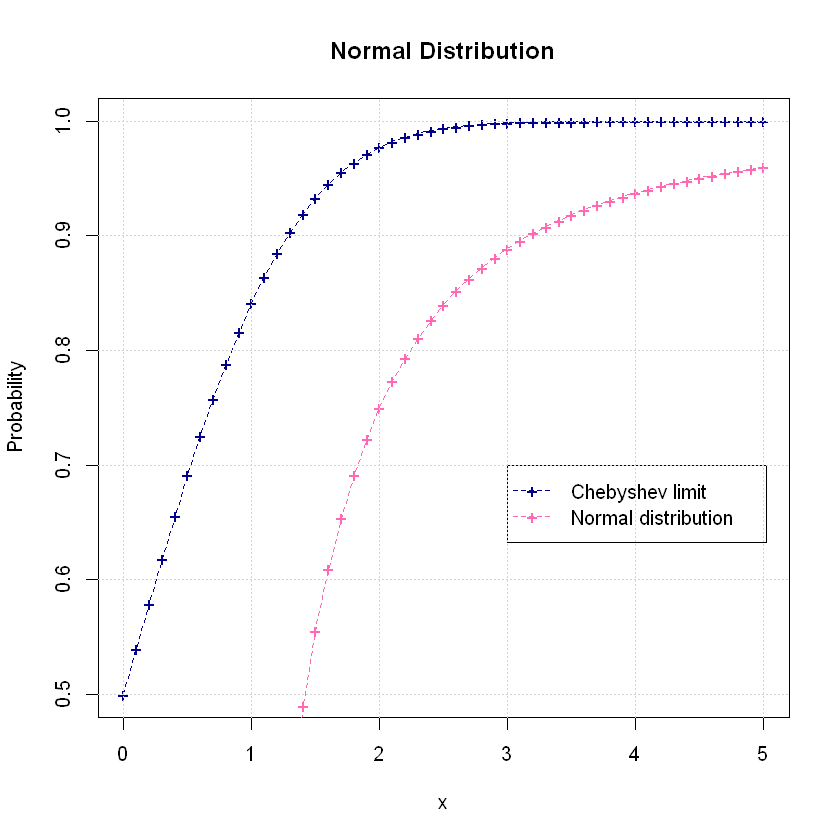

In [8]:
#a) normal distribution
x <- seq(0,5,0.1)
mean <- 3
sd <- 5

plot(x, abs(pnorm(x*sd+mean, mean=mean, sd =sd)), pch = "+", lty = 2, col = "darkblue",
        ylab = "Probability", xlab = "x",
        main = "Normal Distribution")
lines(x, abs(pnorm(x*sd+mean, mean=mean, sd =sd)), lty = 2, col = "darkblue")

points(x, 1-1/(x^2), col = "hotpink", pch = "+")
lines(x, 1-1/(x^2), col = "hotpink", lty = 2)



legend(3, 0.7, legend = c("Chebyshev limit", "Normal distribution"), col = c("darkblue", "hotpink"), 
        lty = c(2,2), pch = c("+", "+"))

grid()



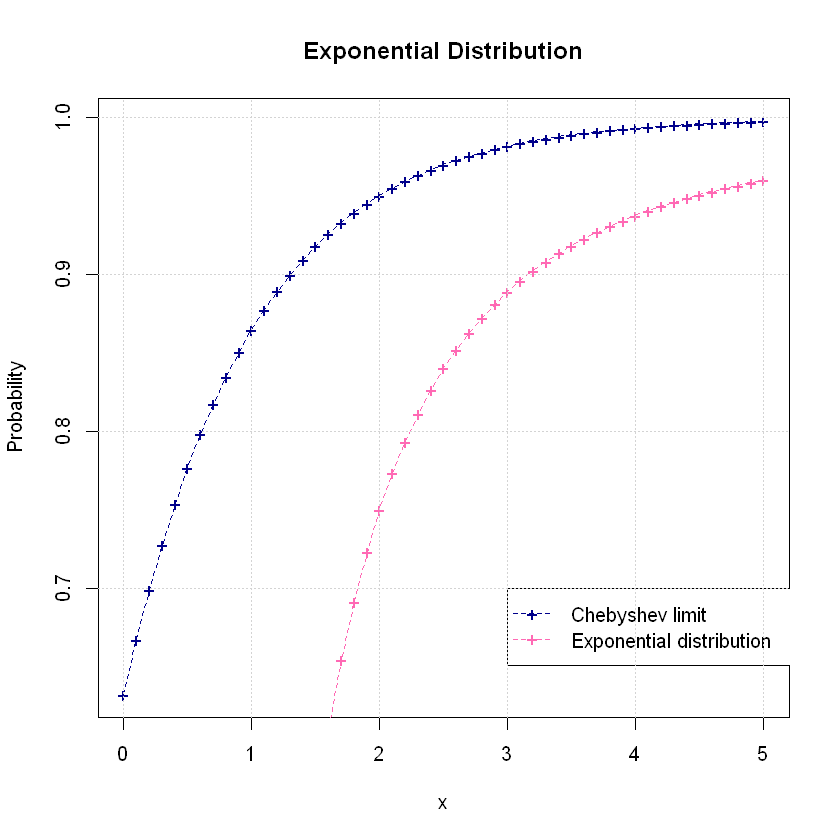

In [9]:
#b) exponential distribution 

x <- seq(0,5,0.1)
mean <- 1
sd <- 1

plot(x, abs(pexp(x*sd+mean, 1)), pch = "+", lty = 2, col = "darkblue",
        ylab = "Probability", xlab = "x",
        main = "Exponential Distribution")
lines(x, abs(pexp(x*sd+mean, 1)), lty = 2, col = "darkblue")

points(x, 1-1/(x^2), col = "hotpink", pch = "+")
lines(x, 1-1/(x^2), col = "hotpink", lty = 2)



legend(3, 0.7, legend = c("Chebyshev limit", "Exponential distribution"), col = c("darkblue", "hotpink"), 
        lty = c(2,2), pch = c("+", "+"))

grid()




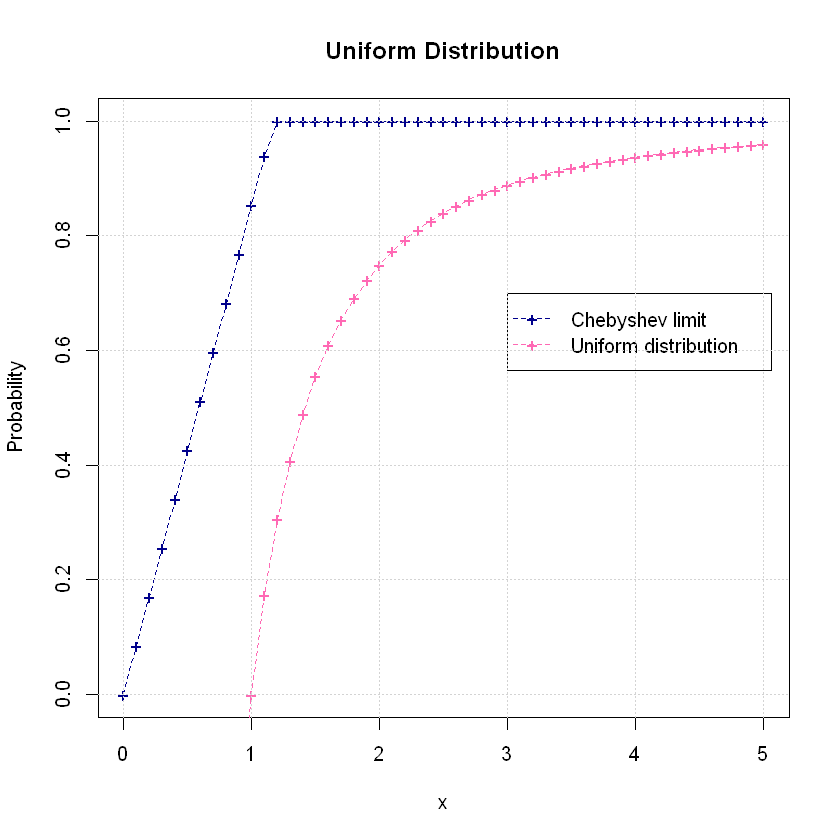

In [10]:
#c) uniform distribution
#plot(x, dunif(x, 1-sqrt(2), 1+sqrt(2)))

x <- seq(0,5,0.1)
mean <- 1-sqrt(2)
sd <- 1+sqrt(2)

plot(x, abs(punif(x*sd+mean, 1-sqrt(2), 1+sqrt(2))), pch = "+", lty = 2, col = "darkblue",
        ylab = "Probability", xlab = "x",
        main = "Uniform Distribution")
lines(x, punif(x*sd+mean, 1-sqrt(2), 1+sqrt(2))-punif(mean- x*sd, 1-sqrt(2), 1+sqrt(2)), lty = 2, col = "darkblue")

points(x, 1-1/(x^2), col = "hotpink", pch = "+")
lines(x, 1-1/(x^2), col = "hotpink", lty = 2)



legend(3, 0.7, legend = c("Chebyshev limit", "Uniform distribution"), col = c("darkblue", "hotpink"), 
        lty = c(2,2), pch = c("+", "+"))

grid()



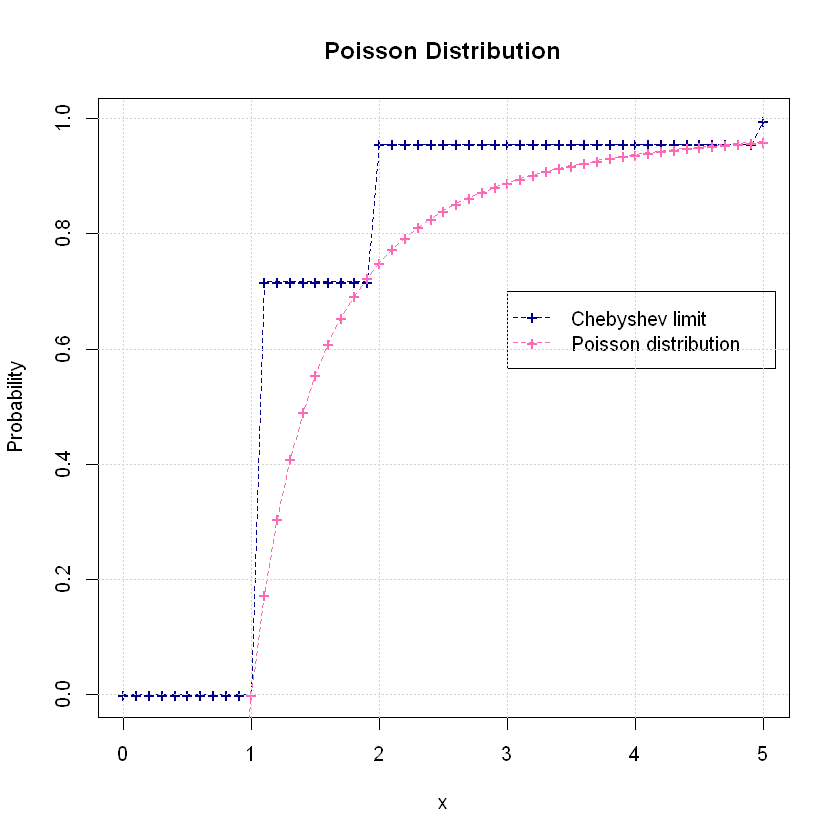

In [11]:
#d) poisson distribution
#plot(x, dpois(x, 1/3))

x <- seq(0,5,0.1)
mean <- 1/3
sd <- 1/3

plot(x, (ppois(x*sd+mean, 1/3)-ppois(mean-x*sd, 1/3)), pch = "+", lty = 2, col = "darkblue",
        ylab = "Probability", xlab = "x",
        main = "Poisson Distribution")
lines(x, (ppois(x*sd+mean, 1/3)-ppois(mean-x*sd, 1/3)), lty = 2, col = "darkblue")

points(x, 1-1/(x^2), col = "hotpink", pch = "+")
lines(x, 1-1/(x^2), col = "hotpink", lty = 2)



legend(3, 0.7, legend = c("Chebyshev limit", "Poisson distribution"), col = c("darkblue", "hotpink"), 
        lty = c(2,2), pch = c("+", "+"))

grid()



### Question 4

In [12]:
data <- read.csv("Global_Mobility_Report.csv",header=T,sep=",")#, skip=1)
globalMobility <- as_tibble(data)
head(globalMobility)



country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1


## UK 

In [13]:
uk_data <- filter(globalMobility, country_region == "United Kingdom")


In [14]:
?week
names(uk_data)
uk_data %>% filter(uk_data$sub_region_1 == "") -> uk_data #take only the data averaged for the whole country - I don't need the values for different regions
#uk_data$date

library(dplyr)

uk_data <- select(uk_data, -c(sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id)) #drop columns that I dont need
head(uk_data)


[1] "country_region_code"                               
 [2] "country_region"                                    
 [3] "sub_region_1"                                      
 [4] "sub_region_2"                                      
 [5] "metro_area"                                        
 [6] "iso_3166_2_code"                                   
 [7] "census_fips_code"                                  
 [8] "place_id"                                          
 [9] "date"                                              
[10] "retail_and_recreation_percent_change_from_baseline"
[11] "grocery_and_pharmacy_percent_change_from_baseline" 
[12] "parks_percent_change_from_baseline"                
[13] "transit_stations_percent_change_from_baseline"     
[14] "workplaces_percent_change_from_baseline"           
[15] "residential_percent_change_from_baseline"

country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
GB,United Kingdom,2020-02-15,-12,-7,-35,-12,-4,2
GB,United Kingdom,2020-02-16,-7,-6,-28,-7,-3,1
GB,United Kingdom,2020-02-17,10,1,24,-2,-14,2
GB,United Kingdom,2020-02-18,7,-1,20,-3,-14,2
GB,United Kingdom,2020-02-19,6,-2,8,-4,-14,3
GB,United Kingdom,2020-02-20,5,-2,4,-5,-14,3


In [15]:
uk_data %>% mutate(week = week(uk_data$date) + 53*(year(uk_data$date)-min(year(uk_data$date)))) -> uk_data
categories <- names(uk_data) 
categories <- categories[! categories %in% c("country_region_code", "country_region", "date")]
categories

#need to find weekly average values for each category
for (x in categories)
    print(x)

weeks <- uk_data$week
weeks <- as.list(weeks)

length(weeks)
class(uk_data)
glimpse(uk_data)

[1] "retail_and_recreation_percent_change_from_baseline"
[2] "grocery_and_pharmacy_percent_change_from_baseline" 
[3] "parks_percent_change_from_baseline"                
[4] "transit_stations_percent_change_from_baseline"     
[5] "workplaces_percent_change_from_baseline"           
[6] "residential_percent_change_from_baseline"          
[7] "week"

[1] "retail_and_recreation_percent_change_from_baseline"
[1] "grocery_and_pharmacy_percent_change_from_baseline"
[1] "parks_percent_change_from_baseline"
[1] "transit_stations_percent_change_from_baseline"
[1] "workplaces_percent_change_from_baseline"
[1] "residential_percent_change_from_baseline"
[1] "week"


[1] 425

[1] "tbl_df"     "tbl"        "data.frame"

Observations: 425
Variables: 10
$ country_region_code                                <fct> GB, GB, GB, GB, ...
$ country_region                                     <fct> United Kingdom, ...
$ date                                               <fct> 2020-02-15, 2020...
$ retail_and_recreation_percent_change_from_baseline <int> -12, -7, 10, 7, ...
$ grocery_and_pharmacy_percent_change_from_baseline  <int> -7, -6, 1, -1, -...
$ parks_percent_change_from_baseline                 <int> -35, -28, 24, 20...
$ transit_stations_percent_change_from_baseline      <int> -12, -7, -2, -3,...
$ workplaces_percent_change_from_baseline            <int> -4, -3, -14, -14...
$ residential_percent_change_from_baseline           <int> 2, 1, 2, 2, 3, 3...
$ week                                               <dbl> 7, 7, 7, 7, 8, 8...


In [17]:
#uk_data %>% group_by(week)# %>% mean()
averaged_data_uk <- aggregate(cbind(retail_and_recreation_percent_change_from_baseline,
                grocery_and_pharmacy_percent_change_from_baseline, 
                parks_percent_change_from_baseline,
                transit_stations_percent_change_from_baseline,
                workplaces_percent_change_from_baseline,
                residential_percent_change_from_baseline) ~ week, data = uk_data, FUN = "mean", na.rm = TRUE)

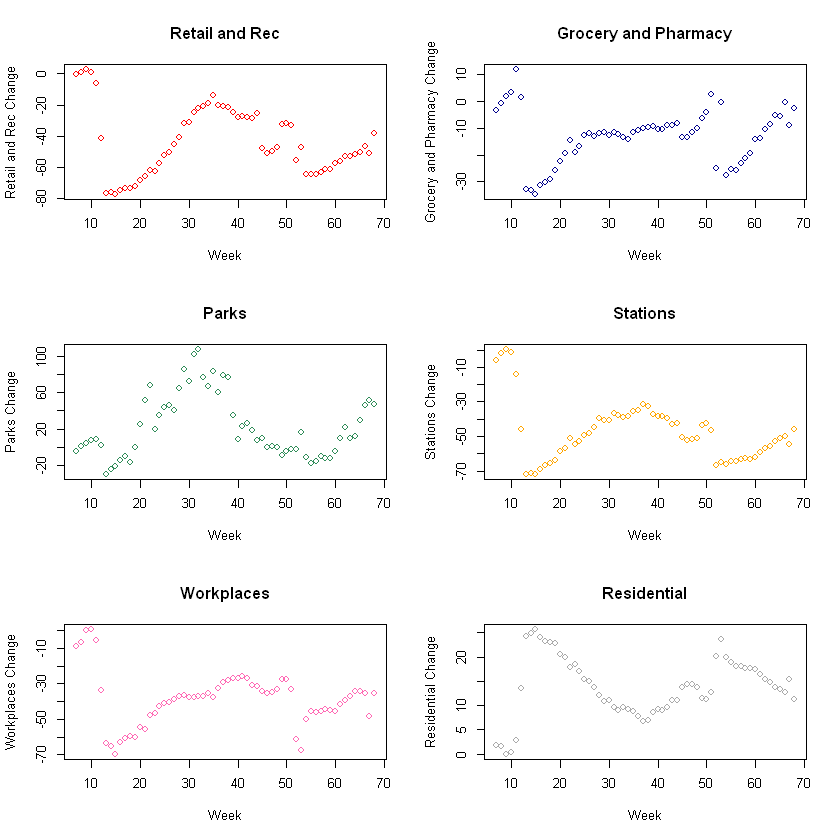

In [18]:
#would be better to do these in a for loop but I couldn't get one working. 

par(mfrow = c(3,2))
plot(averaged_data_uk$week, averaged_data_uk$retail_and_recreation_percent_change_from_baseline,
            xlab = "Week", ylab = "Retail and Rec Change",
            main = "Retail and Rec",
            col = "red")

plot(averaged_data_uk$week, averaged_data_uk$grocery_and_pharmacy_percent_change_from_baseline,
            xlab = "Week", ylab = "Grocery and Pharmacy Change",
            main = "Grocery and Pharmacy",
            col = "darkblue")

plot(averaged_data_uk$week, averaged_data_uk$parks_percent_change_from_baseline,
            xlab = "Week", ylab = "Parks Change",
            main = "Parks",
            col = "seagreen")

plot(averaged_data_uk$week, averaged_data_uk$transit_stations_percent_change_from_baseline,
            xlab = "Week", ylab = "Stations Change",
            main = "Stations",
            col = "orange")

plot(averaged_data_uk$week, averaged_data_uk$workplaces_percent_change_from_baseline,
            xlab = "Week", ylab = "Workplaces Change",
            main = "Workplaces",
            col = "hotpink")

plot(averaged_data_uk$week, averaged_data_uk$residential_percent_change_from_baseline,
            xlab = "Week", ylab = "Residential Change",
            main = "Residential",
            col = "darkgrey")


Can also use ggplot to plot them all simultaneously. 

In [32]:
library(ggplot2)
library(reshape2)

In [21]:
uk_data_melted <- melt(averaged_data_uk, id.vars = "week", variable.name = "series", na.rm = TRUE)

weekly_plot <- ggplot(uk_data_melted, aes(week, value)) + geom_line(aes(color = series))# + facet_grid(series ~ .)

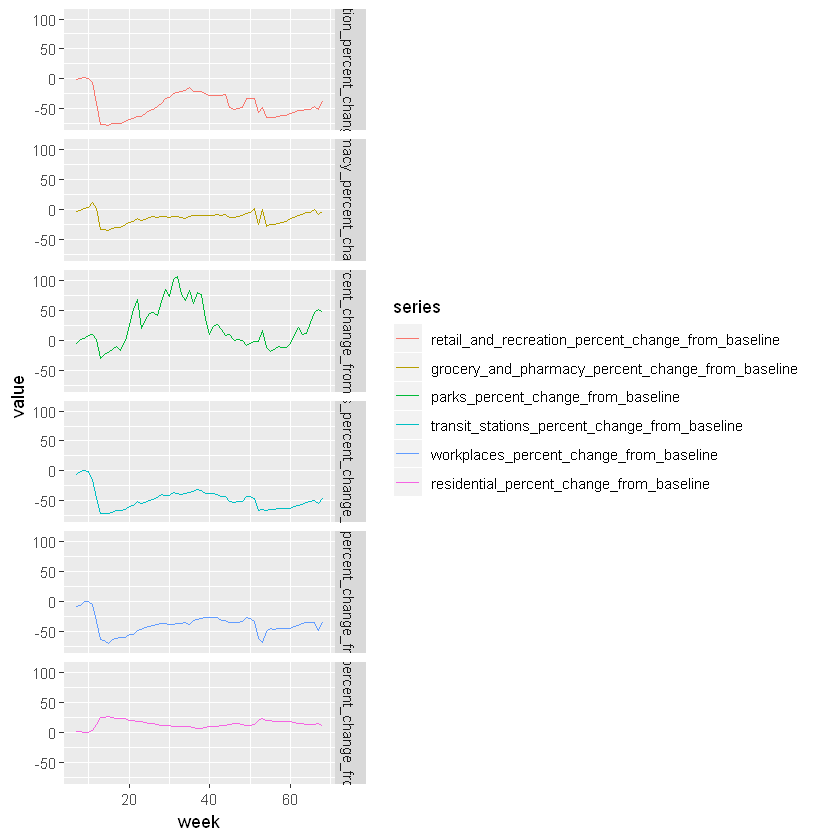

In [22]:
ggplot(uk_data_melted, aes(week, value)) + geom_line(aes(color = series)) + facet_grid(series ~ .)

In [25]:
# monthly averaged values
uk_data %>% mutate(month = month(uk_data$date) + 12*(year(uk_data$date)-min(year(uk_data$date)))) -> uk_data
#average for the months
averaged_data_uk_monthly <- aggregate(cbind(retail_and_recreation_percent_change_from_baseline,
                grocery_and_pharmacy_percent_change_from_baseline, 
                parks_percent_change_from_baseline,
                transit_stations_percent_change_from_baseline,
                workplaces_percent_change_from_baseline,
                residential_percent_change_from_baseline) ~ month, data = uk_data, FUN = "mean", na.rm = TRUE)




Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



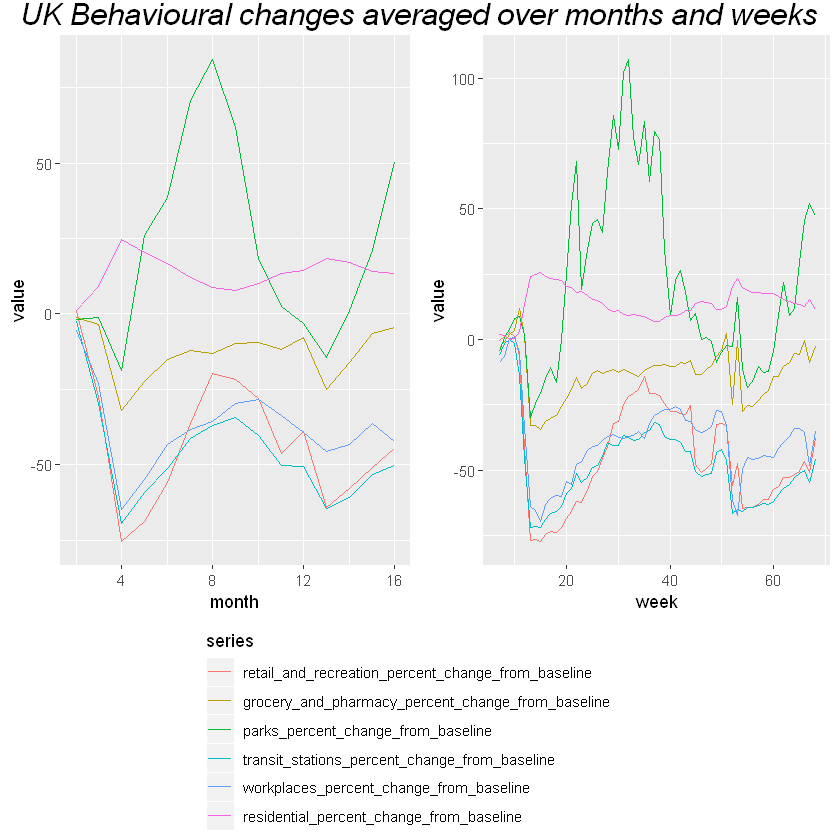

In [26]:
get_legend<-function(myggplot){
  tmp <- ggplot_gtable(ggplot_build(myggplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)
}
                      
uk_data_melted_month <- melt(averaged_data_uk_monthly, id.vars = "month", variable.name = "series", na.rm = TRUE)

monthly_plot <- ggplot(uk_data_melted_month, aes(month, value)) + geom_line(aes(color = series))# + facet_grid(series ~ .)
legend <- get_legend(monthly_plot)

monthly_plot <- monthly_plot + theme(legend.position="none")

weekly_plot <- weekly_plot + theme(legend.position="none")

library(gridExtra)
library(grid)
                      
grid.arrange(monthly_plot,  weekly_plot, legend, nrow = 2, ncol = 2, 
             layout_matrix = rbind(c(1,2), c(3,3)), widths = c(2.7,2.7), 
             heights = c(2.7, 1.0),
             top = textGrob("UK Behavioural changes averaged over months and weeks",
             gp=gpar(fontsize=18,font=3))
             )

Producing the same plots for Poland.
## Poland

In [27]:
polish_data <- filter(globalMobility, country_region == "Poland")
head(polish_data)
#same process as before to select only the data I need
polish_data %>% filter(polish_data$sub_region_1 == "") -> polish_data #take only the data averaged for the whole country - I don't need the values for different regions
names(polish_data)

library(dplyr)

polish_data <- select(polish_data, -c(sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id)) #drop columns that I dont need
head(polish_data)

polish_data %>% mutate(week = week(polish_data$date) + 53*(year(polish_data$date)-min(year(polish_data$date)))) -> polish_data

polish_data %>% mutate(month = month(polish_data$date) + 12*(year(polish_data$date)-min(year(polish_data$date)))) -> polish_data

head(polish_data)


country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
PL,Poland,,,,,NA,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-15,7,-1,26,4,0,-1
PL,Poland,,,,,NA,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-16,12,-13,18,6,-2,0
PL,Poland,,,,,NA,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-17,6,1,20,1,1,0
PL,Poland,,,,,NA,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-18,3,-1,13,-1,1,1
PL,Poland,,,,,NA,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-19,5,0,13,-1,1,0
PL,Poland,,,,,NA,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-20,7,1,23,3,1,0


[1] "country_region_code"                               
 [2] "country_region"                                    
 [3] "sub_region_1"                                      
 [4] "sub_region_2"                                      
 [5] "metro_area"                                        
 [6] "iso_3166_2_code"                                   
 [7] "census_fips_code"                                  
 [8] "place_id"                                          
 [9] "date"                                              
[10] "retail_and_recreation_percent_change_from_baseline"
[11] "grocery_and_pharmacy_percent_change_from_baseline" 
[12] "parks_percent_change_from_baseline"                
[13] "transit_stations_percent_change_from_baseline"     
[14] "workplaces_percent_change_from_baseline"           
[15] "residential_percent_change_from_baseline"

country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
PL,Poland,2020-02-15,7,-1,26,4,0,-1
PL,Poland,2020-02-16,12,-13,18,6,-2,0
PL,Poland,2020-02-17,6,1,20,1,1,0
PL,Poland,2020-02-18,3,-1,13,-1,1,1
PL,Poland,2020-02-19,5,0,13,-1,1,0
PL,Poland,2020-02-20,7,1,23,3,1,0


country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,week,month
PL,Poland,2020-02-15,7,-1,26,4,0,-1,7,2
PL,Poland,2020-02-16,12,-13,18,6,-2,0,7,2
PL,Poland,2020-02-17,6,1,20,1,1,0,7,2
PL,Poland,2020-02-18,3,-1,13,-1,1,1,7,2
PL,Poland,2020-02-19,5,0,13,-1,1,0,8,2
PL,Poland,2020-02-20,7,1,23,3,1,0,8,2


In [30]:
averaged_data_poland_week <- aggregate(cbind(retail_and_recreation_percent_change_from_baseline,
                grocery_and_pharmacy_percent_change_from_baseline, 
                parks_percent_change_from_baseline,
                transit_stations_percent_change_from_baseline,
                workplaces_percent_change_from_baseline,
                residential_percent_change_from_baseline) ~ week, data = polish_data, FUN = "mean", na.rm = TRUE)

averaged_data_poland_month <- aggregate(cbind(retail_and_recreation_percent_change_from_baseline,
                grocery_and_pharmacy_percent_change_from_baseline, 
                parks_percent_change_from_baseline,
                transit_stations_percent_change_from_baseline,
                workplaces_percent_change_from_baseline,
                residential_percent_change_from_baseline) ~ month, data = polish_data, FUN = "mean", na.rm = TRUE)


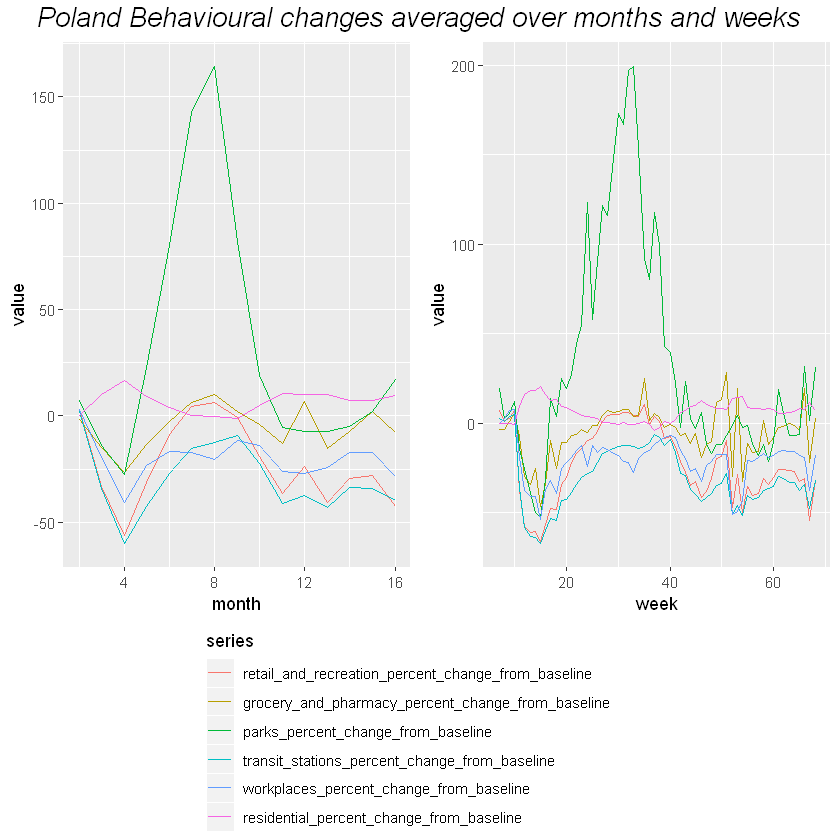

In [31]:
poland_data_melted_month <- melt(averaged_data_poland_month, id.vars = "month", variable.name = "series", na.rm = TRUE)

monthly_plot <- ggplot(poland_data_melted_month, aes(month, value)) + geom_line(aes(color = series))# + facet_grid(series ~ .)
legend <- get_legend(monthly_plot)

monthly_plot <- monthly_plot + theme(legend.position="none")

poland_data_melted_week <- melt(averaged_data_poland_week, id.vars = "week", variable.name = "series", na.rm = TRUE)
weekly_plot <- ggplot(poland_data_melted_week, aes(week, value)) + geom_line(aes(color = series))# + facet_grid(series ~ .)

weekly_plot <- weekly_plot + theme(legend.position="none")

library(gridExtra)
library(grid)
                      
#require(gridExtra)
grid.arrange(monthly_plot,  weekly_plot, legend, nrow = 2, ncol = 2, 
             layout_matrix = rbind(c(1,2), c(3,3)), widths = c(2.7,2.7), 
             heights = c(2.7, 1.0),
             top = textGrob("Poland Behavioural changes averaged over months and weeks",
             gp=gpar(fontsize=16,font=3))
             )

Analysis: similar to the UK, usage of parks increased whereas in all the other categories the usage decreased during lockdowns.